# Project Title: Predict Credit Card Fraud Detection.
                                                By: Vishal Kadu.

### Summary:

1. We are having the dataset containing transaction records of credit cards transactions, the dataset contains 492 frauds out of 284,807 transactions.
2. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
3. Dataset contains only numerical input variables, due to confidentiality issues, the dataset provided that doesn't show the original features and more background information about the data, the variables V1, V2, ... V28 are the principal components.
4. Variable 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
5. The Variable 'Amount' is the transaction Amount.
6. Variable 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Aim: To predict credit card fraud detection.

### Import Relevant Packages and Load the Dataset 

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('creditcard.csv',sep=',') ## loading the dataset to a Pandas DataFrame
print("Dataset Loaded Succesfully.")

Dataset Loaded Succesfully.


### Explore the Dataset

In [3]:
dataset.head() # first 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.tail() # last 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
dataset.describe() #getting some statistical data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
dataset.isnull().sum().any() #checking for missing values in the dataset

False

In [7]:
dataset.shape #checking dataset shape

(284807, 31)

In [8]:
dataset[dataset.duplicated()].count() #checking for duplicate values in the dataset

Time      1081
V1        1081
V2        1081
V3        1081
V4        1081
V5        1081
V6        1081
V7        1081
V8        1081
V9        1081
V10       1081
V11       1081
V12       1081
V13       1081
V14       1081
V15       1081
V16       1081
V17       1081
V18       1081
V19       1081
V20       1081
V21       1081
V22       1081
V23       1081
V24       1081
V25       1081
V26       1081
V27       1081
V28       1081
Amount    1081
Class     1081
dtype: int64

In [9]:
dataset=dataset.drop_duplicates() #droped the duplicates

dataset.shape 

(283726, 31)

In [10]:
dataset.info() # dataset informations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [11]:
dataset.Class.value_counts() #checking count of legal(0) and fraud(1) transactions in the dataset

0    283253
1       473
Name: Class, dtype: int64

([<matplotlib.axis.XTick at 0x7f2d68f75b50>,
 [Text(0, 0, 'Legal'), Text(1, 0, 'Fraud')])

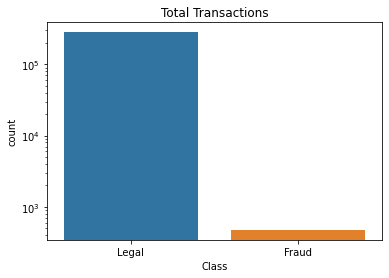

In [12]:
sns.countplot(x='Class',data=dataset).set_yscale('log')

plt.title("Total Transactions")

leb = ["Legal", "Fraud"]

plt.xticks(range(2), leb)


#### Dataset is highly unbalanced as there are 283253 records with normal status and 473 records with fraud status.

In [13]:
dataset.corr() #checking colinearity between variables

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


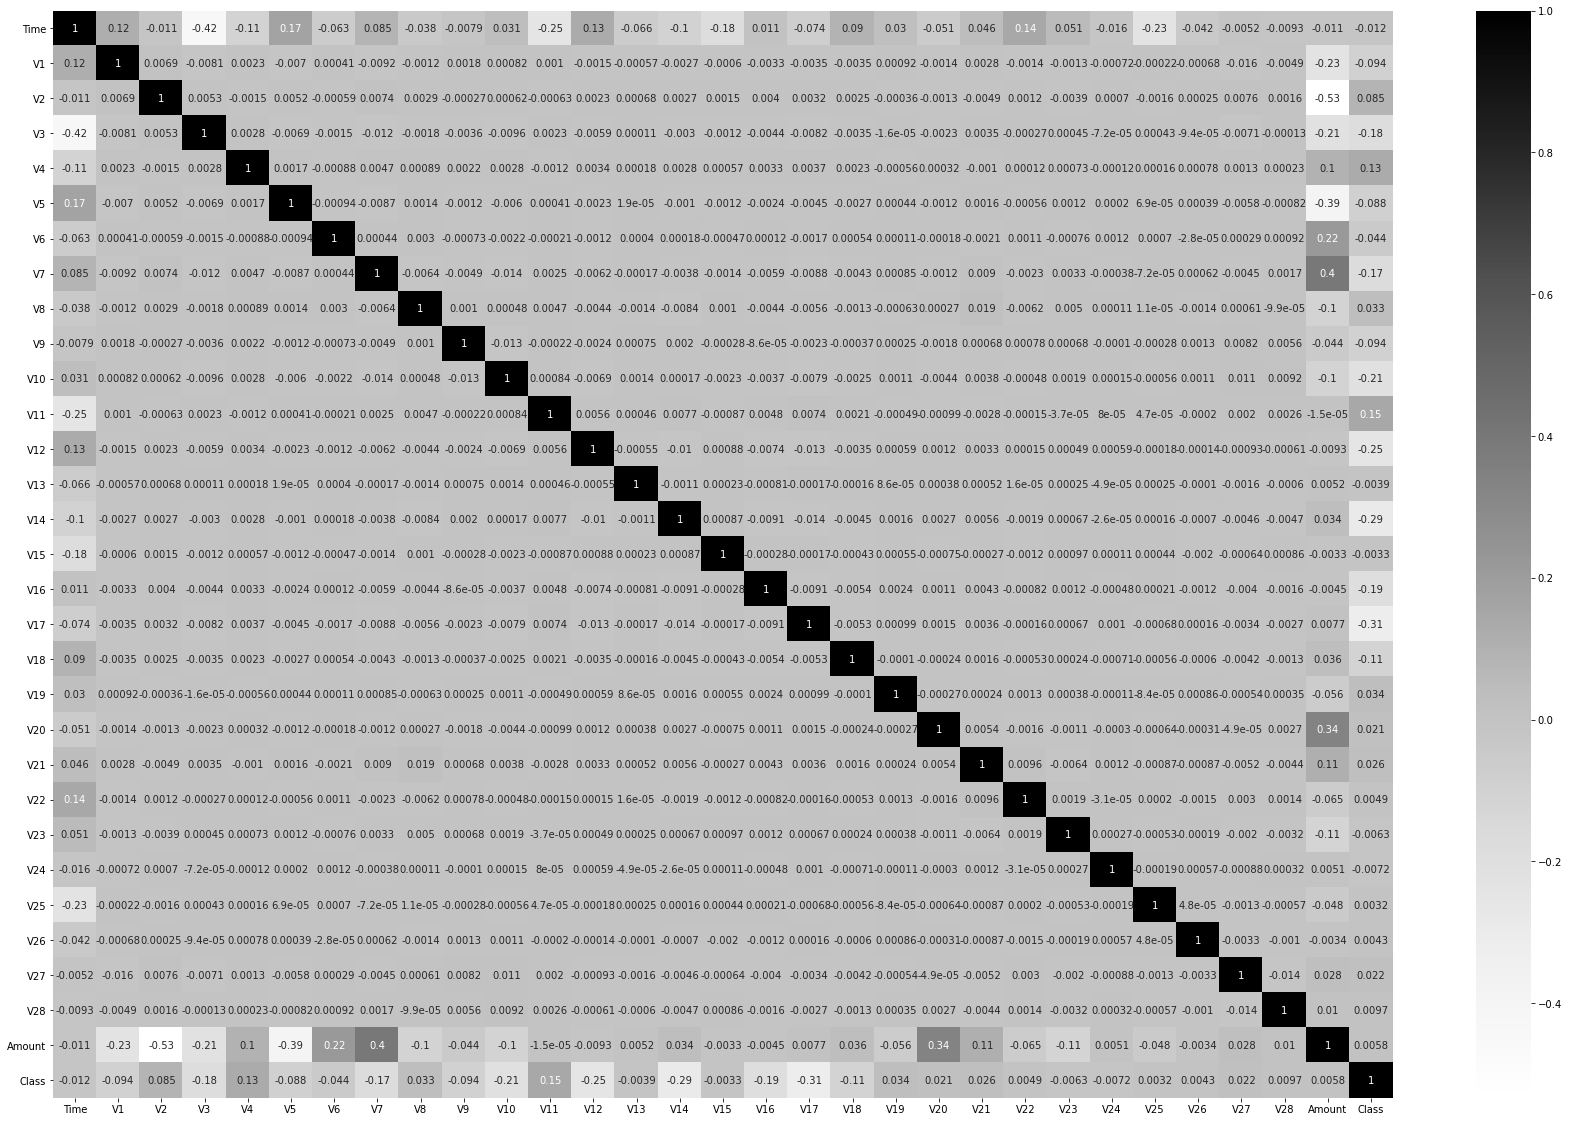

In [14]:
plt.figure(figsize = (30,20))

sns.heatmap(dataset.corr(), annot = True, cmap="Greys")

plt.show()

#### hence it is clear that mutiple variables are correlated.

In [15]:
# separating the data for analysis

legal = dataset[dataset.Class == 0]

fraud = dataset[dataset.Class == 1]

In [16]:
print(f" Legal : {legal.shape} , Fraud : {fraud.shape} ")

 Legal : (283253, 31) , Fraud : (473, 31) 


In [17]:
# statistical measures of the data

print(f" Legal : \n {legal.Amount.describe()} \n\n Fraud : \n {fraud.Amount.describe()} ")


 Legal : 
 count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64 

 Fraud : 
 count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64 


In [18]:
# compare the values for both transactions

dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


creating a sub sample dataset to have normal distribution of class because original dataset is highly skewed.
firstly we will same amount fraud and legal transactions then will combine it and shuffle.
we have 473 fraud transactions so we will take same amount of legal transactions data in our sample subset

In [19]:
dataset = dataset.sample(frac=1)

fraud_ts_data = dataset.loc[dataset['Class'] == 1]  #fraud transactions

legal_ts_data = dataset.loc[dataset['Class'] == 0][:473]  #legal transactions               

norm_dist_data = pd.concat([fraud_ts_data, legal_ts_data])   #combining both     

sub_dataset = norm_dist_data.sample(frac=1, random_state=45)    #shuffling

sub_dataset.head()   

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261056,159844.0,-0.408111,3.132944,-3.098030,5.803893,0.890609,-0.501474,-0.440054,0.591828,-3.267693,...,0.098482,-0.538375,-0.217989,-1.042657,0.314389,0.543244,0.233851,0.119603,45.51,1
9509,14152.0,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00,1
122245,76491.0,1.132919,-0.293956,0.509862,0.004662,-0.895937,-1.009064,-0.124260,-0.170162,0.432043,...,-0.090474,-0.438431,0.031151,0.425689,0.079081,0.897970,-0.087314,0.022183,79.98,0
150668,93860.0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52,1
44223,41851.0,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,...,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,139.90,1


###  Prepare Dataset for Training

In [20]:
# Splitting the data into Features & Targets

X = sub_dataset.drop(columns=['Time','Class'], axis=1) #column Time is Droped as it's not important.

Y = sub_dataset['Class']

In [21]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
261056,-0.408111,3.132944,-3.098030,5.803893,0.890609,-0.501474,-0.440054,0.591828,-3.267693,-2.223070,...,0.499568,0.098482,-0.538375,-0.217989,-1.042657,0.314389,0.543244,0.233851,0.119603,45.51
9509,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,...,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00
122245,1.132919,-0.293956,0.509862,0.004662,-0.895937,-1.009064,-0.124260,-0.170162,0.432043,-0.240010,...,0.073418,-0.090474,-0.438431,0.031151,0.425689,0.079081,0.897970,-0.087314,0.022183,79.98
150668,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,-14.924655,...,-0.810146,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52
44223,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,-16.649628,...,0.427203,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,139.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85945,-1.354507,-0.716132,-1.080823,-2.519462,2.851035,2.293273,-0.636888,1.153795,-1.964364,-0.064053,...,-0.190583,-0.220959,-0.879468,-0.139322,1.036965,0.023278,0.886763,-0.096203,-0.133418,8.00
82044,-0.352641,-0.428616,0.023140,-3.579620,1.506780,3.300556,-0.623668,0.777879,-2.495838,0.919760,...,-0.243851,-0.165971,-0.343195,-0.171299,0.969293,0.109887,-0.355313,-0.022024,0.106212,25.00
115295,0.920083,-0.085790,0.128287,1.217457,-0.103758,-0.155778,0.326102,-0.029225,-0.253665,-0.005785,...,0.077194,0.134814,0.315382,-0.215803,0.274613,0.691456,-0.291539,0.005127,0.023540,119.42
143992,-2.253339,1.866577,1.161305,-1.946778,-0.175479,-0.375630,0.667066,-0.027203,1.751240,2.321260,...,1.107729,-0.354096,-0.202168,-0.019912,-0.021960,-0.137292,0.715159,0.770841,0.192347,0.77


In [22]:
Y

261056    1
9509      1
122245    0
150668    1
44223     1
         ..
85945     0
82044     0
115295    0
143992    0
191544    1
Name: Class, Length: 946, dtype: int64

#### Spliting  the data into Training & Testing Data.

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=45)

### Applying Prediction Algorithm & Train Model to Fit. 

In [31]:
# Logistic Regression

LR = LogisticRegression()

# training the Logistic Regression Model with Training Data

LR.fit(X_train, Y_train)

LogisticRegression()

#### Prediction using Test data 

In [25]:
LR.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [26]:
# accuracy on training data

Y_train_prediction = LR.predict(X_train)

print('Training Data Accuracy Score is\t', accuracy_score(Y_train_prediction, Y_train)*100,'%')

Training Data Accuracy Score is	 94.57671957671958 %


In [27]:
# accuracy on test data

Y_test_prediction = LR.predict(X_test)

print('Testing Data Accuracy Score is\t',accuracy_score(Y_test_prediction, Y_test)*100,'%' )


Testing Data Accuracy Score is	 95.26315789473684 %


In [28]:
#applying confusion matrix

print("Confusion matrix is,\n\n",confusion_matrix(Y_test, Y_test_prediction))

print('\n')

print("Classification Report is,\n\n",classification_report(Y_test,Y_test_prediction))

Confusion matrix is,

 [[90  5]
 [ 4 91]]


Classification Report is,

               precision    recall  f1-score   support

           0       0.96      0.95      0.95        95
           1       0.95      0.96      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



### Creating a test case and generate a predicted result from system.

In [30]:
test_list=[-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.016822468180826,0.416955705037907,0.126910559061474,0.517232370861764,-0.035049368605297,-0.465211076182388,0.320198198514526,0.044519167473172,0.177839798284401,0.261145002567677,-0.143275874698919,0]

test_df = pd.DataFrame(test_list)               

test = test_df.transpose()                            

test_pred = LR.predict(test)           

if(test_pred == 0):                            

    print("It's a Legal transaction.")

else:

    print("It's a Fraud transaction.") 

It's a Fraud transaction.


### End.